
<img src="./logo_UTN.svg" align="right" width="150" /> 
 Teoría de Circuitos II

# Trabajo semanal 16
#### Israel Pavelek

Diseñe el cuadripolo A para que se comporte como:

* Filtro pasa bajos Bessel de 3er. orden 
* No disipativo
* Normalizado en frecuencia e impedancia

* Respetando la siguiente topología:

<img src="./topologia.png" align="center" width="500" /> 


* Obtenga la impedancia de entrada al cuadripolo A, cargado con un resistor de 1Ω a la salida.
* Sintetice A como un cuadripolo escalera.
* Simule el comportamiento de la red en LTspice graficando S21 y S11 en función de la frecuencia. 
* Explique el comportamiento de A a partir de los valores de S11 en las siguientes frecuencias:

    ** centro de la banda de paso
    
    ** frecuencia de corte
    
    ** transición y centro de la banda de detenida

* Modifique el circuito para que la frecuencia de corte sea 2 π 10⁶ rad/s y la resistencia del generador sea 50Ω.


## Punto 1

Un filtro de Bessel normalizado pasabajo de 3er orden tiene la siguiente expresion:

$$H(s)=\frac{15}{s^3+6s^2+15s+15}$$

$H(-s)=\frac{15}{-s^3+6s^2-15s+15}$

$|H(s)|^2=H(s)\cdot H(-s)$

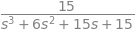

In [1]:
from sympy import *
import numpy as np
from scipy.signal import tf2sos

init_printing(use_unicode=True)
s = symbols('s',relational=True)

H=15/(s*s*s+6*s*s+15*s+15)
H

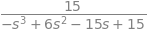

In [2]:
Hi=H.subs(s,-s)
Hi

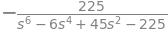

In [3]:
Hmod=H*Hi
simplify(Hmod)

Sabemos que:

$|S_{21}|^2=|H(s)|^2$

$|S_{21}|^2=-\frac{225}{s^6-6s^4+45s^2-225}$

$|S_{21}|^2+|S_{11}|^2=1$

$|S_{11}|^2=1-|S_{21}|^2$

Entonces:

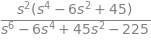

In [4]:
S11m=1-Hmod
simplify(S11m)

$|S_{11}|^2=S_{11}(s)\cdot S_{11}(-s)$

In [5]:
ceros=[]
num=np.roots([1,0,-6,0,45,0,0])
num.round(2)
for cero in num:
    if (cero.real <= 0):
        ceros.append(cero.round(2))
print(ceros)   

[(-2.2+1.36j), (-2.2-1.36j), 0j, 0j]


In [6]:
polos=[]

den=np.roots([1,0,-6,0,45,0,-225])
den.round(2)
for polo in den:
    if (polo.real <= 0):
        polos.append(polo.round(2))
print(polos) 

[(-2.32+0j), (-1.84+1.75j), (-1.84-1.75j)]


In [7]:
den_2sos=[]
polos_simply=[]
polos_simply.append(polos[0])
for i in range(1,len(polos)):
    if((polos[i].real!=polos[i-1].real) or (polos[i].imag!=-polos[i-1].imag)):
        polos_simply.append(polos[i])
for polo in polos_simply:
    if(polo.imag!=0):
        den_2sos.append([1, -2*(polo.real.round(3)), (polo.real**2+polo.imag**2).round(3)])
    else:
        den_2sos.append([1, -polo.real])
print(den_2sos)

[[1, 2.32], [1, 3.68, 6.448]]


In [8]:
den_2sos=[]
ceros_simply=[]
ceros_simply.append(ceros[0])
for i in range(1,len(ceros)):
    if((ceros[i].real!=ceros[i-1].real) or (ceros[i].imag!=-ceros[i-1].imag)):
        ceros_simply.append(ceros[i])
for cero in ceros_simply:
    if(cero.imag!=0):
        den_2sos.append([1, -2*(cero.real.round(3)), (cero.real**2+cero.imag**2).round(3)])
    else:
        den_2sos.append([1, -cero.real])
print(den_2sos)

[[1, 4.4, 6.69], [1, -0.0]]


In [9]:
numS11=s*(s*s+4.4*s+6.69)
expand(numS11)

In [10]:
denS11=(s+2.3)*(s*s+3.68*s+6.44)
expand(denS11)

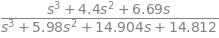

In [11]:
S11=(s*s*s+4.4*s*s+6.69*s)/(s*s*s+5.98*s*s+14.904*s+14.812)
S11

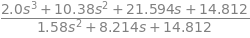

In [12]:
Z1=(1+S11)/(1-S11)
simplify(Z1)

<img src="./sintesis.png" align="center" width="500" /> 

En la siguiente simulación vemos la respuesta de modulo y en linea punteada el retardo de grupo, que lo vemos constante en la banda de paso:

<img src="./Simu.png" align="center" width="500" /> 


Desnormalizando el circuito para $\omega_n= 2\pi\cdot 10^6 \frac{rad}{seg}$ y $Rn=50\Omega$

$C'=\frac{C}{\omega_n \cdot Rn}$

$R'=R \cdot Rn$

$L'=L \cdot \frac{Rn}{\omega_n}$


<img src="./Simudesnorm.png" align="center" width="500" /> 




Análisis de S11, vemos podemos ver en el gráfico para continua, S11 tiende a cero, lo que significa que se encuentra adaptado el circuito, a medida que nos acercamos a la banda de rechazo tenemos 0dB lo que significa que el circuito está desadaptado, ya en la frecuencia de corte tenemos bastante desadaptado el filtro.